In [36]:
import pandas as pd
import os, pickle
import warnings
import datetime
warnings.filterwarnings('ignore')

In [37]:
path_to_data = r"../data/raw/stock prices"

In [38]:
# Get the list of all csv files in path_to_data and all subfolders
csv_files = []
for root, dirs, files in os.walk(path_to_data):
    for f in files:
        if f.endswith('.csv'):
            csv_files.append(os.path.join(root, f))

csv_files

['../data/raw/stock prices\\aal_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\algt_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\alk_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\dal_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\ita_intraday-15min_historical-data-05-31-2025.csv',
 '../data/raw/stock prices\\iyt_intraday-15min_historical-data-05-31-2025.csv',
 '../data/raw/stock prices\\jblu_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\jets_intraday-15min_historical-data-05-31-2025.csv',
 '../data/raw/stock prices\\luv_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\ual_intraday-15min_historical-data-05-30-2025.csv']

In [39]:
# Loop through the files, limiting columns and appending airline tickers to a df
for file in csv_files:
    ticker = file.split('_')[0].split('\\')[-1].upper()  # Extract ticker from filename

    if file == csv_files[0]:
        df_main = pd.read_csv(file)
        df_main['ticker'] = ticker
    else:
        df_temp = pd.read_csv(file)
        df_temp['ticker'] = ticker
        df_main = pd.concat([df_main, df_temp], ignore_index=True)
df_main['ticker'].value_counts()

ticker
AAL     20000
ALGT    20000
ALK     20000
DAL     20000
ITA     20000
IYT     20000
JBLU    20000
JETS    20000
LUV     20000
UAL     20000
Name: count, dtype: int64

In [40]:
df_main = df_main.dropna(subset=['Open'])
df_main

,Time,Open,High,Low,Last,Change,%Chg,Volume,ticker
0,2022-05-03 11:15,18.6900,18.7700,18.665,18.7450,0.0550,+0.29%,844892.0,AAL
1,2022-05-03 11:30,18.7450,18.8550,18.735,18.8350,0.0900,+0.48%,790483.0,AAL
2,2022-05-03 11:45,18.8400,18.8500,18.740,18.7761,-0.0589,-0.31%,600037.0,AAL
3,2022-05-03 12:00,18.7703,18.8100,18.654,18.7272,-0.0489,-0.26%,738723.0,AAL
4,2022-05-03 12:15,18.7300,18.8200,18.730,18.7400,0.0128,+0.07%,582906.0,AAL
...,...,...,...,...,...,...,...,...,...
199994,2025-05-30 14:45,79.2600,79.6200,79.180,79.4800,0.2300,+0.29%,144655.0,UAL
199995,2025-05-30 15:00,79.4900,79.7650,79.420,79.5200,0.0400,+0.05%,169821.0,UAL
199996,2025-05-30 15:15,79.5500,79.9600,79.420,79.9100,0.3900,+0.49%,402686.0,UAL
199997,2025-05-30 15:30,79.9200,80.0649,79.560,79.7600,-0.1500,-0.19%,232344.0,UAL


In [41]:
df_main = df_main.dropna()
# Convert 'Time' column to datetime format
df_main['Time'] = pd.to_datetime(df_main['Time'], format='%Y-%m-%d %H:%M')
df_main['%Chg'] = df_main['%Chg'].str.replace('%', '').astype(float)
df_main = df_main[df_main['Time'] >= datetime.datetime(2022,5,3,11,15)]
df_main

,Time,Open,High,Low,Last,Change,%Chg,Volume,ticker
0,2022-05-03 11:15:00,18.6900,18.7700,18.665,18.7450,0.0550,0.29,844892.0,AAL
1,2022-05-03 11:30:00,18.7450,18.8550,18.735,18.8350,0.0900,0.48,790483.0,AAL
2,2022-05-03 11:45:00,18.8400,18.8500,18.740,18.7761,-0.0589,-0.31,600037.0,AAL
3,2022-05-03 12:00:00,18.7703,18.8100,18.654,18.7272,-0.0489,-0.26,738723.0,AAL
4,2022-05-03 12:15:00,18.7300,18.8200,18.730,18.7400,0.0128,0.07,582906.0,AAL
...,...,...,...,...,...,...,...,...,...
199994,2025-05-30 14:45:00,79.2600,79.6200,79.180,79.4800,0.2300,0.29,144655.0,UAL
199995,2025-05-30 15:00:00,79.4900,79.7650,79.420,79.5200,0.0400,0.05,169821.0,UAL
199996,2025-05-30 15:15:00,79.5500,79.9600,79.420,79.9100,0.3900,0.49,402686.0,UAL
199997,2025-05-30 15:30:00,79.9200,80.0649,79.560,79.7600,-0.1500,-0.19,232344.0,UAL


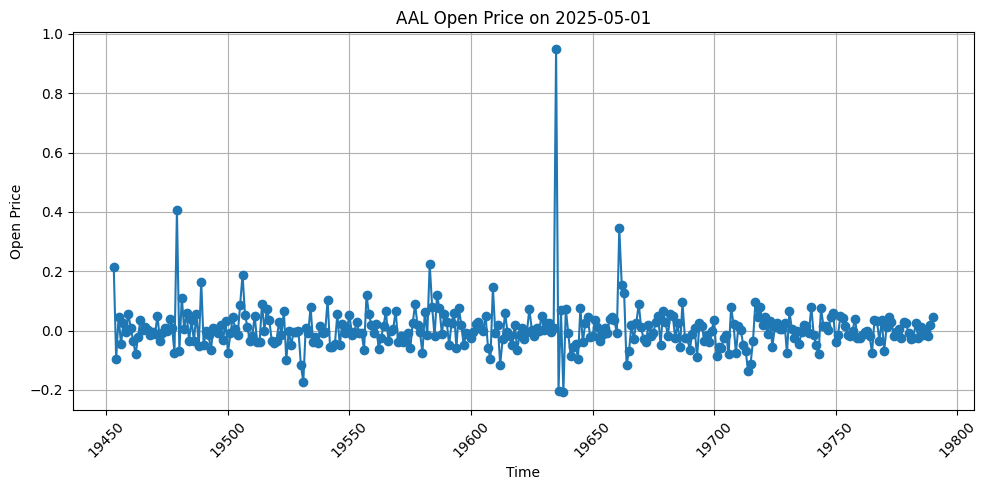

In [42]:
# Line plot of open price for AAL where date between 2025-05-01 and 2025-05-10
import matplotlib.pyplot as plt
df_aal = df_main[df_main['ticker'] == 'AAL']
df_aal = df_aal[(df_aal['Time'] >= '2025-05-01') & (df_aal['Time'] <= '2025-05-20')]
plt.figure(figsize=(10, 5))
plt.plot(df_aal.index, df_aal['Change'], marker='o', linestyle='-')
plt.title('AAL Open Price on 2025-05-01')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()


(-2.0, 2.0)

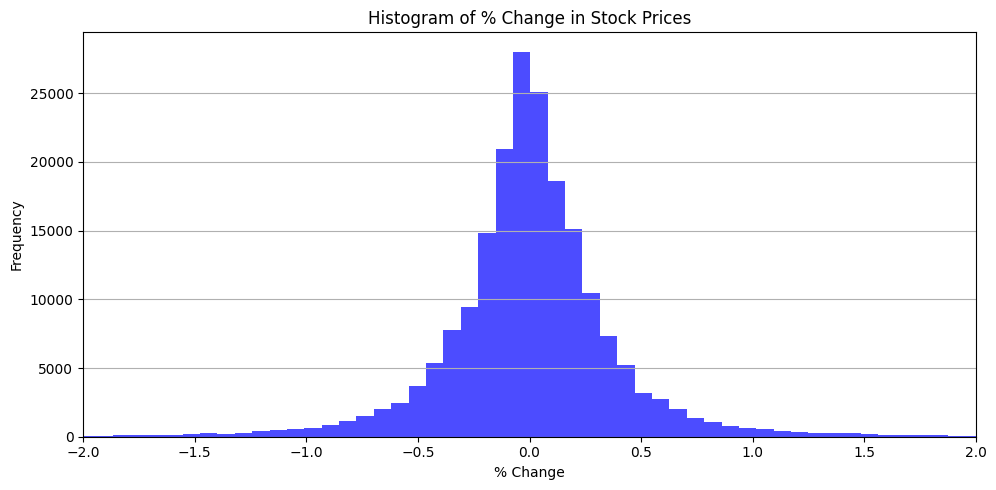

In [43]:
# histogram of %Chg
plt.figure(figsize=(10, 5))
plt.hist(df_main['%Chg'], bins=500, color='blue', alpha=0.7)
plt.title('Histogram of % Change in Stock Prices')
plt.xlabel('% Change')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.xlim(-2,2)

## Feature Engineering

### Finance Vars
- High-Low spread
- High-Low % spread
- Last-Open spread
- Last-Open % spread
- Rolling variance
- variance of Rolling variance

### Lags
- idk how many to use

### Dummies
- Day of week
- Hour of day
- Month of year
- First observation per day

In [44]:
# Finance variables
df_main['High-Low']   =  df_main['High'] - df_main['Low']
df_main['High-Low%']  = (df_main['High'] / df_main['Open']) - 1
df_main['Last-Open']  =  df_main['Open'] - df_main['Last']
df_main['Last-Open%'] = (df_main['Open'] / df_main['Last']) - 1

df_main.sort_values(by=['ticker', 'Time'], inplace=True)

# 10-period rolling variance
df_main['Roll_SD_Last_10'] = df_main.groupby('ticker')['Last'].rolling(window=10).std().reset_index(level=0, drop=True)
df_main['Roll_SDSD_Last_10'] = df_main.groupby('ticker')['Roll_SD_Last_10'].rolling(window=10).std().reset_index(level=0, drop=True)

df_main['Roll_SD_Volume_10'] = df_main.groupby('ticker')['Volume'].rolling(window=10).std().reset_index(level=0, drop=True)
df_main['Roll_SDSD_Volume_10'] = df_main.groupby('ticker')['Roll_SD_Volume_10'].rolling(window=10).std().reset_index(level=0, drop=True)

In [45]:
df_main

,Time,Open,High,Low,Last,Change,%Chg,Volume,ticker,High-Low,High-Low%,Last-Open,Last-Open%,Roll_SD_Last_10,Roll_SDSD_Last_10,Roll_SD_Volume_10,Roll_SDSD_Volume_10
0,2022-05-03 11:15:00,18.6900,18.7700,18.665,18.7450,0.0550,0.29,844892.0,AAL,0.1050,0.004280,-0.0550,-0.002934,NaN,NaN,NaN,NaN
1,2022-05-03 11:30:00,18.7450,18.8550,18.735,18.8350,0.0900,0.48,790483.0,AAL,0.1200,0.005868,-0.0900,-0.004778,NaN,NaN,NaN,NaN
2,2022-05-03 11:45:00,18.8400,18.8500,18.740,18.7761,-0.0589,-0.31,600037.0,AAL,0.1100,0.000531,0.0639,0.003403,NaN,NaN,NaN,NaN
3,2022-05-03 12:00:00,18.7703,18.8100,18.654,18.7272,-0.0489,-0.26,738723.0,AAL,0.1560,0.002115,0.0431,0.002301,NaN,NaN,NaN,NaN
4,2022-05-03 12:15:00,18.7300,18.8200,18.730,18.7400,0.0128,0.07,582906.0,AAL,0.0900,0.004805,-0.0100,-0.000534,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2025-05-30 14:45:00,79.2600,79.6200,79.180,79.4800,0.2300,0.29,144655.0,UAL,0.4400,0.004542,-0.2200,-0.002768,0.598762,0.110445,47740.900266,4953.878558
199995,2025-05-30 15:00:00,79.4900,79.7650,79.420,79.5200,0.0400,0.05,169821.0,UAL,0.3450,0.003460,-0.0300,-0.000377,0.557718,0.108516,52320.000572,4930.155855
199996,2025-05-30 15:15:00,79.5500,79.9600,79.420,79.9100,0.3900,0.49,402686.0,UAL,0.5400,0.005154,-0.3600,-0.004505,0.504865,0.092079,102610.581952,18510.212673
199997,2025-05-30 15:30:00,79.9200,80.0649,79.560,79.7600,-0.1500,-0.19,232344.0,UAL,0.5049,0.001813,0.1600,0.002006,0.524070,0.081629,106247.824199,25102.479218


In [46]:
# Moving averages
# 4-period moving average of 'Last'
df_main['MA4_Last'] = df_main.groupby('ticker')['Last'].transform(lambda x: x.rolling(window=4).mean())
df_main['MA12_Last'] = df_main.groupby('ticker')['Last'].transform(lambda x: x.rolling(window=12).mean())

In [47]:
df_main.columns

Index(['Time', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Volume',
       'ticker', 'High-Low', 'High-Low%', 'Last-Open', 'Last-Open%',
       'Roll_SD_Last_10', 'Roll_SDSD_Last_10', 'Roll_SD_Volume_10',
       'Roll_SDSD_Volume_10', 'MA4_Last', 'MA12_Last'],
      dtype='object')

In [48]:
# Lags
#cols_to_lag = ['Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Volume',
#       'High-Low', 'High-Low%', 'Last-Open', 'Last-Open%',
#       'Roll_SD_Last_10', 'Roll_SDSD_Last_10', 'Roll_SD_Volume_10',
#       'Roll_SDSD_Volume_10']
cols_to_lag = ['Last', 'MA4_Last', 'MA12_Last']

for col in cols_to_lag:
    for i in range(1, 13):
           df_main[f'{col}_Lag{i}'] = df_main.groupby('ticker')[col].shift(i)

In [49]:
# reshape the data to wide format, adding the ticker as a prefix to all columns
to_reshape = df_main.columns.difference(['Time', 'ticker'])
df_wide = df_main.pivot_table(index='Time', columns='ticker', values=to_reshape, aggfunc='first')

In [50]:
df_wide.columns

MultiIndex([(  '%Chg',  'AAL'),
            (  '%Chg', 'ALGT'),
            (  '%Chg',  'ALK'),
            (  '%Chg',  'DAL'),
            (  '%Chg',  'ITA'),
            (  '%Chg',  'IYT'),
            (  '%Chg', 'JBLU'),
            (  '%Chg', 'JETS'),
            (  '%Chg',  'LUV'),
            (  '%Chg',  'UAL'),
            ...
            ('Volume',  'AAL'),
            ('Volume', 'ALGT'),
            ('Volume',  'ALK'),
            ('Volume',  'DAL'),
            ('Volume',  'ITA'),
            ('Volume',  'IYT'),
            ('Volume', 'JBLU'),
            ('Volume', 'JETS'),
            ('Volume',  'LUV'),
            ('Volume',  'UAL')],
           names=[None, 'ticker'], length=530)

In [51]:
# Flatten the MultiIndex column names
df_wide.columns = [f'{ticker}_{col}' for col, ticker in df_wide.columns]
df_wide

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,AAL_Volume,ALGT_Volume,ALK_Volume,DAL_Volume,ITA_Volume,IYT_Volume,JBLU_Volume,JETS_Volume,LUV_Volume,UAL_Volume
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-03 11:15:00,0.29,0.43,0.38,0.35,0.30,0.12,0.44,0.38,0.50,0.57,...,844892.0,1301.0,41583.0,238305.0,8774.0,11840.0,190094.0,164376.0,154237.0,443830.0
2022-05-03 11:30:00,0.48,0.17,0.30,0.16,-0.07,-0.06,0.43,0.28,0.27,0.33,...,790483.0,600.0,63809.0,306057.0,9534.0,14400.0,281642.0,150046.0,81734.0,436964.0
2022-05-03 11:45:00,-0.31,-0.30,-0.28,-0.21,-0.03,-0.06,-0.25,-0.19,-0.02,-0.17,...,600037.0,700.0,25094.0,127499.0,5753.0,4216.0,172335.0,164080.0,75172.0,253895.0
2022-05-03 12:00:00,-0.26,-0.21,-0.40,-0.05,-0.25,-0.24,-0.53,-0.23,-0.10,-0.19,...,738723.0,1100.0,23609.0,187039.0,19499.0,11000.0,325702.0,105845.0,74510.0,281991.0
2022-05-03 12:15:00,0.07,0.08,0.06,-0.12,0.03,0.00,0.00,0.00,0.04,-0.12,...,582906.0,1941.0,33947.0,182581.0,15343.0,30884.0,157744.0,79716.0,77891.0,374569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.22,0.13,0.09,0.02,0.10,0.12,0.39,0.09,0.12,0.29,...,1445222.0,6516.0,27711.0,261687.0,9343.0,738.0,791081.0,19757.0,171924.0,144655.0
2025-05-30 15:00:00,0.09,-0.03,-0.09,0.21,0.11,0.02,-0.39,0.07,0.21,0.05,...,1866339.0,5159.0,43059.0,206491.0,9035.0,3369.0,763213.0,30811.0,228804.0,169821.0
2025-05-30 15:15:00,0.26,0.21,0.24,0.35,0.22,0.18,0.29,0.22,0.21,0.49,...,1436577.0,11567.0,70278.0,394754.0,12738.0,3297.0,1133607.0,64582.0,281941.0,402686.0


In [34]:
# Save the processed DataFrame to a pickle file
df_wide = df_wide[df_wide.index >= datetime.datetime(2022, 5, 5, 9, 0)]

output_path = r"../data/processed/stock_data.pkl"
with open(output_path, 'wb') as f:
    pickle.dump(df_wide, f)

In [53]:
df_wide.columns.to_list()

['AAL_%Chg',
 'ALGT_%Chg',
 'ALK_%Chg',
 'DAL_%Chg',
 'ITA_%Chg',
 'IYT_%Chg',
 'JBLU_%Chg',
 'JETS_%Chg',
 'LUV_%Chg',
 'UAL_%Chg',
 'AAL_Change',
 'ALGT_Change',
 'ALK_Change',
 'DAL_Change',
 'ITA_Change',
 'IYT_Change',
 'JBLU_Change',
 'JETS_Change',
 'LUV_Change',
 'UAL_Change',
 'AAL_High',
 'ALGT_High',
 'ALK_High',
 'DAL_High',
 'ITA_High',
 'IYT_High',
 'JBLU_High',
 'JETS_High',
 'LUV_High',
 'UAL_High',
 'AAL_High-Low',
 'ALGT_High-Low',
 'ALK_High-Low',
 'DAL_High-Low',
 'ITA_High-Low',
 'IYT_High-Low',
 'JBLU_High-Low',
 'JETS_High-Low',
 'LUV_High-Low',
 'UAL_High-Low',
 'AAL_High-Low%',
 'ALGT_High-Low%',
 'ALK_High-Low%',
 'DAL_High-Low%',
 'ITA_High-Low%',
 'IYT_High-Low%',
 'JBLU_High-Low%',
 'JETS_High-Low%',
 'LUV_High-Low%',
 'UAL_High-Low%',
 'AAL_Last',
 'ALGT_Last',
 'ALK_Last',
 'DAL_Last',
 'ITA_Last',
 'IYT_Last',
 'JBLU_Last',
 'JETS_Last',
 'LUV_Last',
 'UAL_Last',
 'AAL_Last-Open',
 'ALGT_Last-Open',
 'ALK_Last-Open',
 'DAL_Last-Open',
 'ITA_Last-Open',
 

In [54]:
# Simple version
df_wide2 = df_wide[df_wide.index >= datetime.datetime(2022, 5, 5, 9, 0)]

df_wide2 = df_wide2[[
 'AAL_Last',
 'ALGT_Last',
 'ALK_Last',
 'DAL_Last',
 'ITA_Last',
 'IYT_Last',
 'JBLU_Last',
 'JETS_Last',
 'LUV_Last',
 'UAL_Last',
]]

output_path = r"../data/processed/stock_data_simple.pkl"
with open(output_path, 'wb') as f:
    pickle.dump(df_wide2, f)

In [55]:
df_wide2

,AAL_Last,ALGT_Last,ALK_Last,DAL_Last,ITA_Last,IYT_Last,JBLU_Last,JETS_Last,LUV_Last,UAL_Last
Time,,,,,,,,,,
2022-05-05 09:30:00,19.3500,156.740,52.6100,43.3400,105.7100,61.3925,11.2600,21.520,47.6609,51.350
2022-05-05 09:45:00,19.2200,155.295,52.5016,43.2553,105.4000,61.3375,11.2500,21.445,47.5900,51.020
2022-05-05 10:00:00,19.1600,154.910,52.3480,43.1900,104.7200,61.1175,11.2099,21.390,47.6100,50.850
2022-05-05 10:15:00,19.0700,154.360,52.0500,42.9300,104.6400,60.8625,11.1400,21.270,47.3750,50.506
2022-05-05 10:30:00,19.1000,153.915,51.9000,42.8600,104.5600,60.7750,11.1400,21.270,47.3100,50.510
...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,11.4250,55.945,51.3300,48.3850,176.8500,65.4800,5.1300,22.675,33.4150,79.480
2025-05-30 15:00:00,11.4350,55.930,51.2850,48.4850,177.0475,65.4950,5.1100,22.690,33.4850,79.520
2025-05-30 15:15:00,11.4650,56.050,51.4100,48.6550,177.4300,65.6100,5.1250,22.740,33.5550,79.910
